In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io.wavfile import read
from scipy import signal
from IPython.display import Audio, Image
import librosa
import librosa.display
import pylab
from numpy.fft import fft, ifft
%matplotlib inline
import math
from PIL import Image, ImageDraw

In [2]:
triads = pd.read_csv("./triads.csv")
triads.head(20)

,Chord,Note1,Note2,Note3
0,C_maj_2_0,C_2,E_2,G_2
1,C_maj_3_0,C_3,E_3,G_3
2,C_maj_4_0,C_4,E_4,G_4
3,C_maj_5_0,C_5,E_5,G_5
4,C_maj_6_0,C_6,E_6,G_6
5,C_maj_7_0,C_7,E_7,G_7
6,Cs_maj_2_0,Cs_2,F_2,Gs_2
7,Cs_maj_3_0,Cs_3,F_3,Gs_3
8,Cs_maj_4_0,Cs_4,F_4,Gs_4
9,Cs_maj_5_0,Cs_5,F_5,Gs_5


In [3]:
def make_keyboard(chord):
    key_width = 15
    key_height = 100
    octaves = 7
    
    white_keys = ["C","D","E","F","G","A","B"]
    black_keys = ['Cs',"Eb","Fs","Gs","Bb"]
    
    notes2 = []
    notes2.append([str(chord['Note1'].values[0]).split("_")[0], str(chord['Note1'].values[0]).split("_")[1]])
    notes2.append([str(chord['Note2'].values[0]).split("_")[0], str(chord['Note2'].values[0]).split("_")[1]])
    notes2.append([str(chord['Note3'].values[0]).split("_")[0], str(chord['Note3'].values[0]).split("_")[1]])
    
    img_width = (key_width) * 7 * (octaves + 1)
    img_height = key_height + 5

    img = Image.new("RGB", (img_width, img_height), color=(230,230,230))
    img1 = ImageDraw.Draw(img)

    # Draw the white keys
    for i in range(2, octaves + 2):
        offset = (i * (key_width + 2) * 7) - ((key_width + 2) * 7 * 2)
          # Draw the white keys
        j = 1
        for note in white_keys:
            fill_color = "FFFFFF"
            if (note == notes2[0][0] and str(i) == notes2[0][1]) or (note == notes2[1][0] and str(i) == notes2[1][1]) or (note == notes2[2][0] and str(i) == notes2[2][1]):
                fill_color = "FF0000"
            x = j * (key_width + 2) + offset - key_width
            w = j * (key_width + 2) + key_width + offset - key_width
            img1.rectangle([(x, 0), (w, key_height)], fill = "#" + fill_color, outline ="#555555")
            j += 1
            
             # Draw the black keys
    for i in range(2, octaves + 2):
        offset = (i * (key_width + 2) * 7) - ((key_width + 2) * 7 * 2)
        j = 1
        for note in black_keys:
            fill_color = "444444"
            if (note == notes2[0][0] and str(i) == notes2[0][1]) or (note == notes2[1][0] and str(i) == notes2[1][1]) or (note == notes2[2][0] and str(i) == notes2[2][1]):
                fill_color = "FF0000"

            if (j == 3):
                j += 1   
                x = j * (key_width + 2) + offset - key_width + (key_width / 2) + 4
            w = j * (key_width + 2) + key_width + offset - key_width  + (key_width / 2)
            img1.rectangle([(x , 0), (w, key_height * .65)], fill = "#" + fill_color, outline = "#555555")
                
            j += 1

    display(img)

In [4]:
# The chord we want to get (all chord names are uppercase, maj/min is in lowercase)
chord = "G_dim"

# The Octave
octave = "6"

# Inversion (Root = 0, First Inversion = 1)
inversion = "0"

# Load the wav and make a player
filename = chord + "_" + octave + "_" + inversion

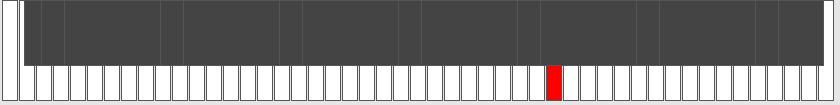

In [5]:
# Get the note names/positions from the data
chord = triads[triads['Chord'] == filename]

# Display the notes on the keyboard
make_keyboard(chord)

In [6]:
sample_rate, wav_data = read("./piano_triads/" + filename + ".wav")
Audio(wav_data, rate=sample_rate)

In [8]:
# Plot out some waveforms and a Mel Freq spectrogram
y, sr = librosa.load("./input/piano-triads-wavset/piano_triads/" + filename + ".wav")
y_harm, y_perc = librosa.effects.hpss(wav_data)

fig, ax = plt.subplots(nrows=1, ncols= 3, figsize=(15,5))
librosa.display.waveplot(y, sr=sr, ax=ax[0])

librosa.display.waveplot(y_harm, sr=sr, alpha=0.25, ax=ax[1])
librosa.display.waveplot(y_perc, sr=sr, color='r', alpha=0.5, ax=ax[1])

S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)
mel = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000, ax=ax[2])
fig.colorbar(mel, ax=ax[2], format='%+2.0f dB')

ax[0].set(title='Monophonic');
ax[1].set(title='Harmonic + Percussive');
ax[2].set(title='Mel-frequency spectrogram');
ax[2].set(title='New');

FileNotFoundError: [Errno 2] No such file or directory: './input/piano-triads-wavset/piano_triads/G_dim_6_0.wav'

In [12]:
import os
import IPython
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, fftfreq
from scipy.signal import spectrogram, find_peaks

In [ ]:
curr_freq=55
freq_list=[]
for i in range(96):
    freq_list.append(curr_freq)
    curr_freq *=